# Alpha blending

Alpha blending ― техника создания эффекта полупрозрачности путём объединения исходного пикселя с пикселем, уже находящимся во фрейм-буфере. Каждому пикселю обычно ставятся в соответствие значения красного, зелёного и синего компонентов цвета (RGB). Если ставится в соответствие ещё и альфа-значение, то говорят, что пиксели имеют альфа-канал (компонент A).

Альфа-значение определяет степень прозрачности конкретного пикселя. Объекты могут иметь различную прозрачность, например 8-битный альфа-канал может представлять 256 уровней прозрачности: от 0 (всё растровое изображение прозрачное) до 255 (всё растровое изображение непрозрачное). Альфа-смешение есть процесс комбинирования двух объектов на экране с учётом их альфа-каналов. Альфа-смешение используется для: антиалиасинга; создания прозрачности, теней, зеркал, тумана.



Расчёт яркости результирующего пикселя после наложения двух пикселей друг на друга выполняется по формуле:

 $$R=B\cdot (1-A)+F\cdot A$$
 
 или в иной записи:

$$R=B+(F-B)\cdot A$$


Обозначения:

* B — яркость фонового пикселя;
* F — яркость накладываемого пикселя;
* A ∈ [0...1] — непрозрачность накладываемого пикселя;
* R ― результат.

Вторая запись отображает следующий смысл: значение A указывает относительное положение на отрезке [B..F].

In [1]:
import sys
import cv2 as cv

In [2]:
from PIL import Image

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
# plt.figure(figsize=(10,10))
# plt.rcParams["figure.figsize"] = (30, 30)

In [5]:
img_water = mpimg.imread('water.jpeg')
resized = cv.resize(img_water, (300, 300)) / 255.0
img_horse = mpimg.imread('horse.jpg')
resized2 = cv.resize(img_horse, (300, 300)) / 255.0

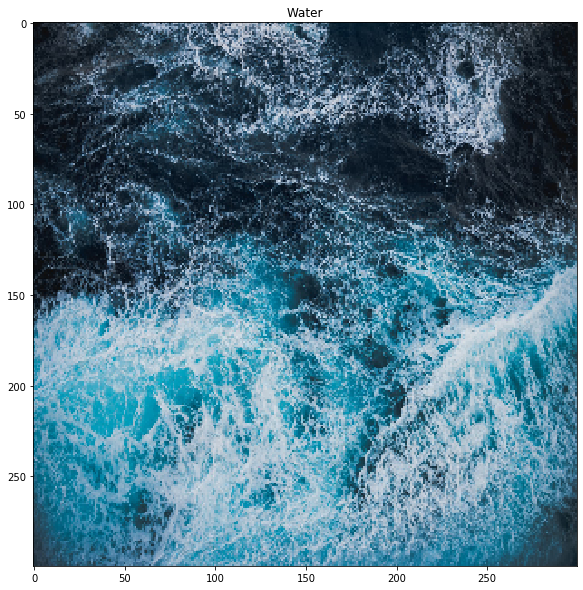

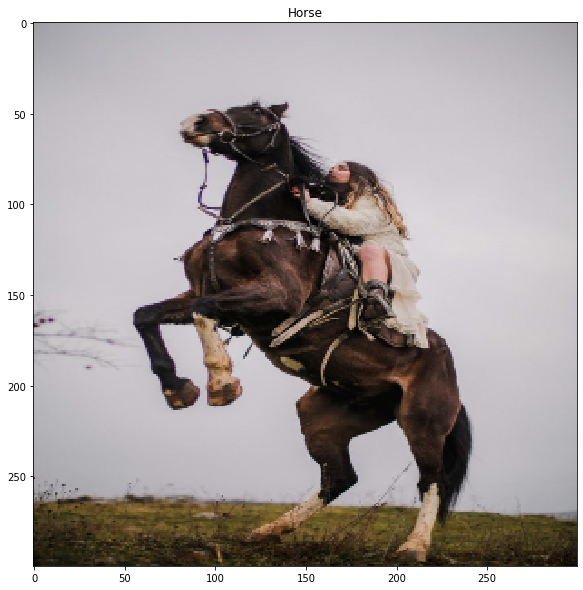

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(resized)
plt.title('Water')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(resized2)
plt.title('Horse')
plt.show()

In [7]:
alpha1 = 0.5
blend1 = resized * alpha1 + resized2 * (1.0 - alpha1)

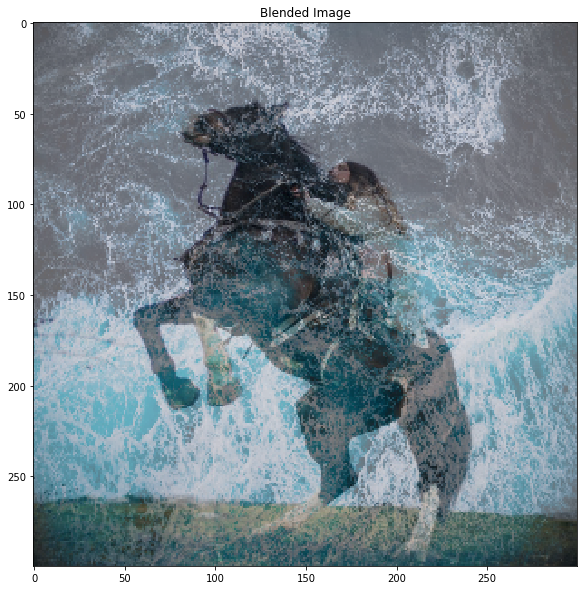

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(blend1)
plt.title('Blended Image')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


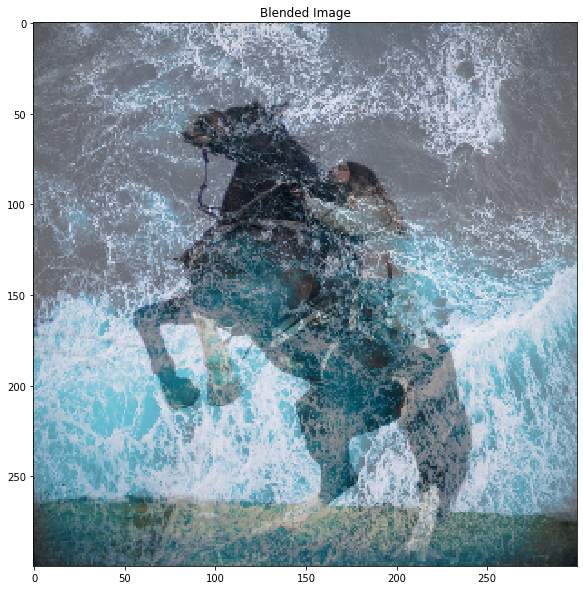

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

blend2 = cv.addWeighted(resized,0.6,resized2,0.5,0)
plt.imshow(blend2)
plt.title('Blended Image')
plt.show()

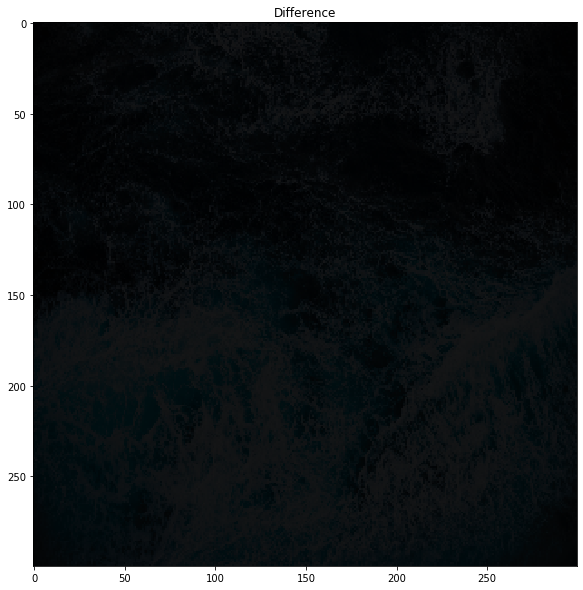

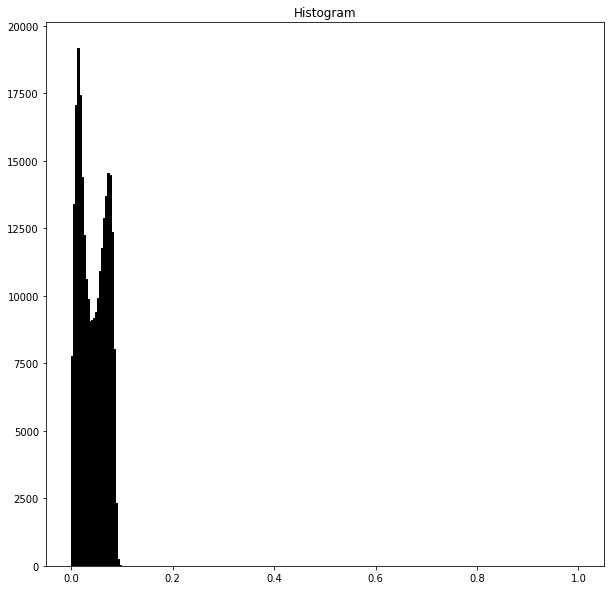

In [12]:
dif = abs(cv.subtract(blend1, blend2))

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(dif)
plt.title('Difference')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(dif.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.title('Histogram')
plt.show()

In [ ]:
# color the mask red
dif2 = abs(cv.subtract(blend1, blend2))
Conv_hsv_Gray = cv.cvtColor((dif2*255.0).astype('uint8'), cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(Conv_hsv_Gray, 0, 255,cv.THRESH_BINARY_INV |cv.THRESH_OTSU)
dif[mask != 255] = [255, 0, 0]

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(dif)
plt.title('Difference')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(dif2.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.title('Histogram')
plt.show()

In [13]:
foreground = cv.imread("bear.png")
foreground = cv.cvtColor(foreground, cv.COLOR_BGR2RGB) / 255.0
background = cv.imread("beach.jpg")
background = cv.cvtColor(background, cv.COLOR_BGR2RGB) / 255.0
background = cv.resize(background, foreground.shape[:2][::-1])
alpha = cv.imread("mask_bear.png") / 255.0

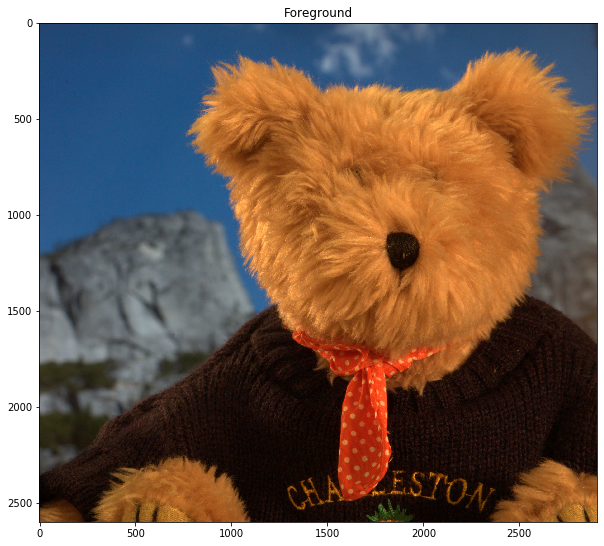

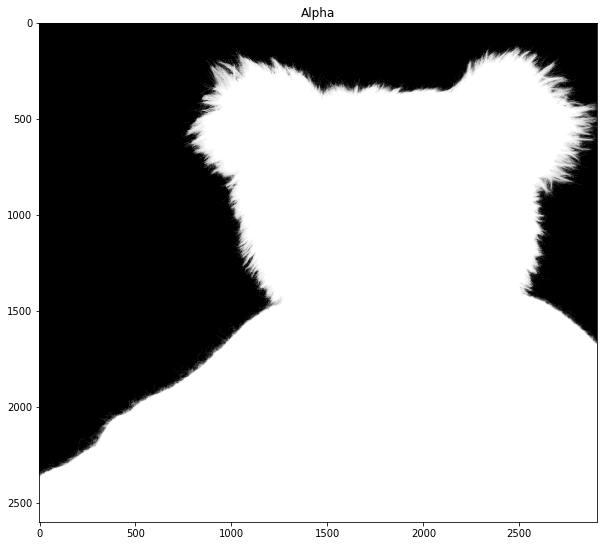

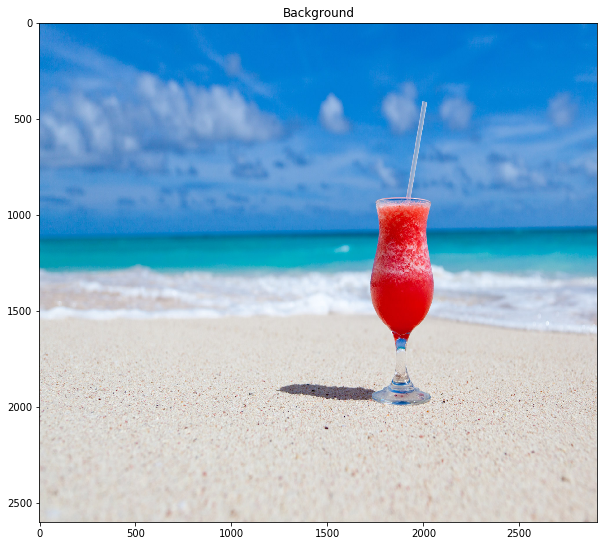

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(foreground)
plt.title('Foreground')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(alpha)
plt.title('Alpha')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(background)
plt.title('Background')
plt.show()


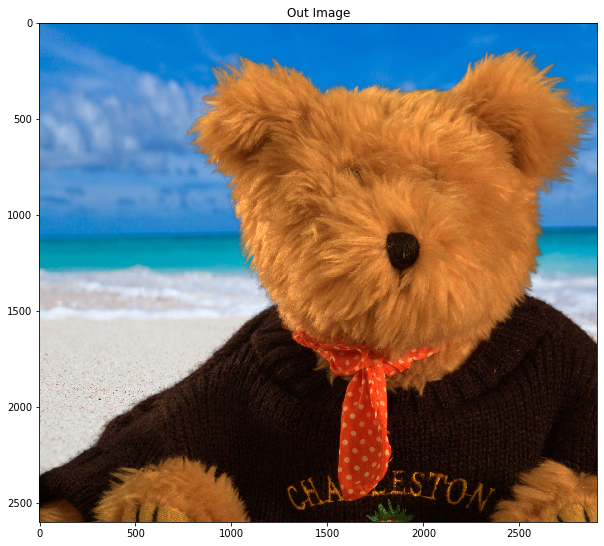

In [15]:
outImage = foreground * alpha + background * (1.0 - alpha)

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(outImage)
plt.title('Out Image')
plt.show()